In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.preprocessing import MinMaxScaler


In [2]:
#  Load the dataset and dataframe

df=pd.read_csv('dummy_data_p326_2.csv')
df1=pd.DataFrame(df)
print(df1)


     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        False     False  
1    

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           668 non-null    int64 
 1   gender        668 non-null    object
 2   time_spent    668 non-null    int64 
 3   platform      668 non-null    object
 4   interests     668 non-null    object
 5   location      668 non-null    object
 6   demographics  668 non-null    object
 7   profession    668 non-null    object
 8   income        668 non-null    int64 
 9   indebt        668 non-null    bool  
 10  isHomeOwner   668 non-null    bool  
 11  Owns_Car      668 non-null    bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 33.3+ KB
None


In [4]:
num_attributes = len(df.columns)
print("Number of attributes:", num_attributes)

Number of attributes: 12


In [5]:
num_rows = len(df)
print("Number of objects:", num_rows)

Number of objects: 668


In [6]:
attribute_types = df.dtypes

print("Data types of attributes:")
print(attribute_types)

Data types of attributes:
age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object


In [7]:
class_labels = df['interests'].unique()

print("Class labels:")
print(class_labels)

Class labels:
['Sports' 'Travel' 'Lifestlye']


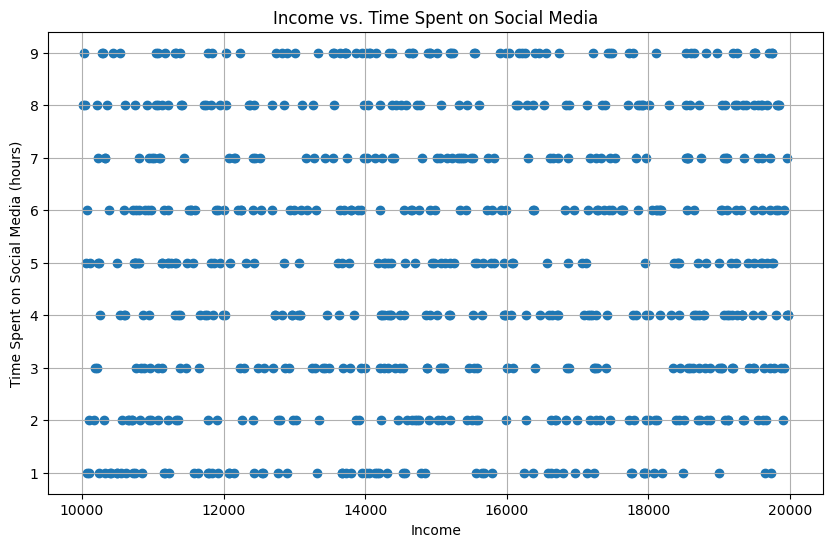

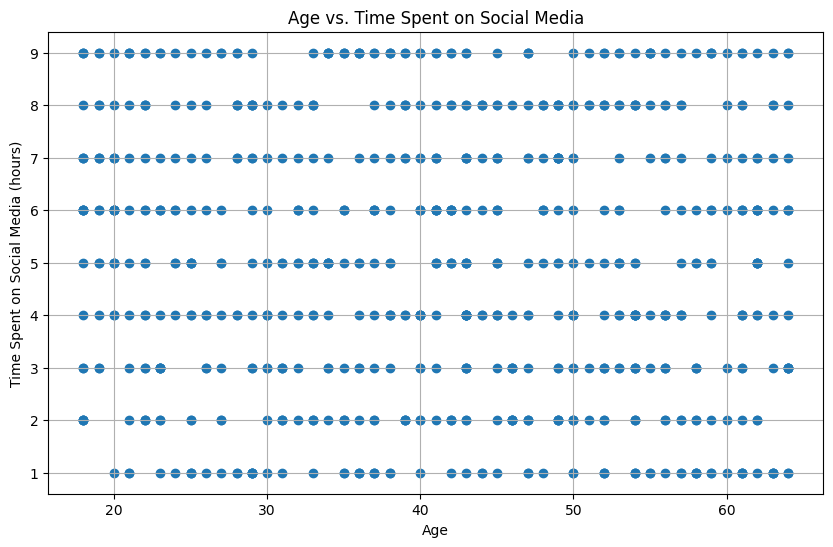

In [8]:
# Explore relationships between variables with scatter plots
plt.figure(figsize=(10, 6))
# Income vs. Time Spent on Social Media scatter plots
plt.scatter(df['income'], df['time_spent'])
plt.title('Income vs. Time Spent on Social Media')
plt.xlabel('Income')
plt.ylabel('Time Spent on Social Media (hours)')
plt.grid(True)
plt.show()

# Explore relationships between variables with scatter plots

plt.figure(figsize=(10, 6))
# Age vs. Time Spent on Social Media scatter plots
plt.scatter(df['age'], df['time_spent'])
plt.title('Age vs. Time Spent on Social Media')
plt.xlabel('Age')
plt.ylabel('Time Spent on Social Media (hours)')
plt.grid(True)
plt.show()


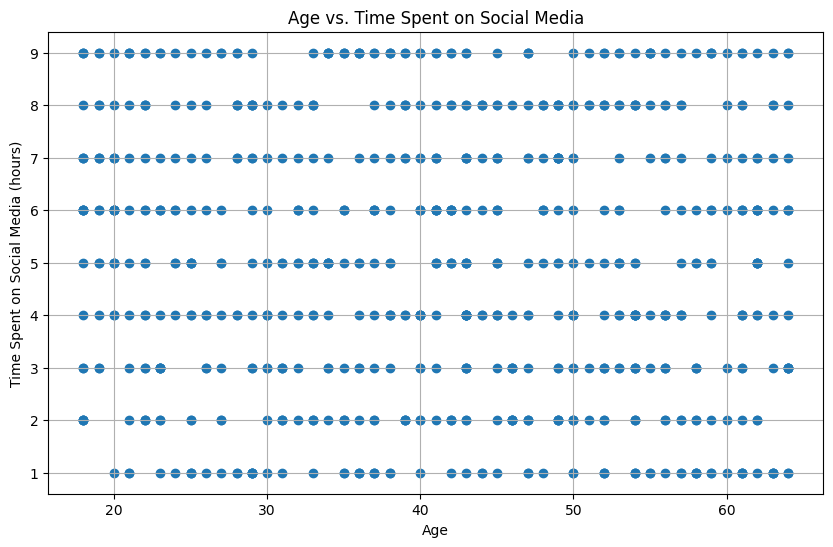

In [9]:
# Age vs. Time Spent on Social Media scatter plots

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['time_spent'])
plt.title('Age vs. Time Spent on Social Media')
plt.xlabel('Age')
plt.ylabel('Time Spent on Social Media (hours)')
plt.grid(True)
plt.show()

## - Description :
- This scatterplot helps us to determine whether the age and time spint are corelated to each
other or not, it shows that the two attributes are not corelated and has no proportional relationship.


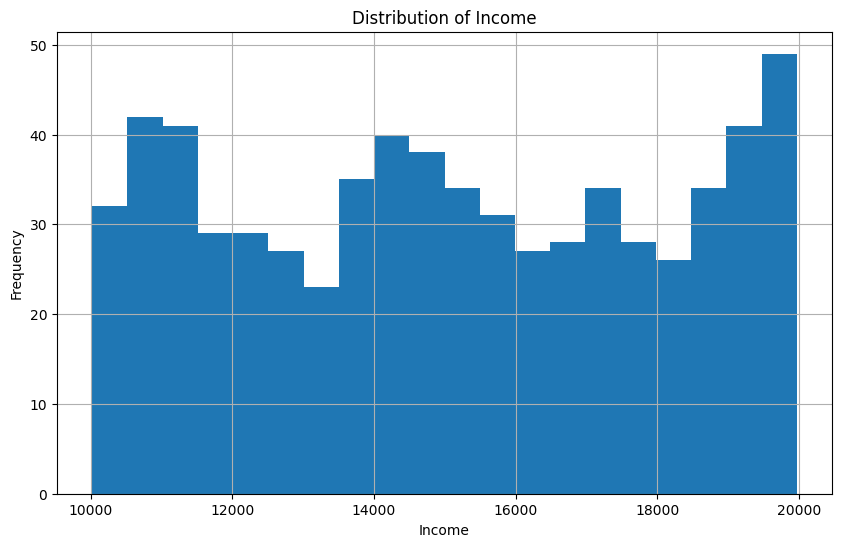

In [10]:
# Generate histograms to visualize the distribution of key variables
df['income'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

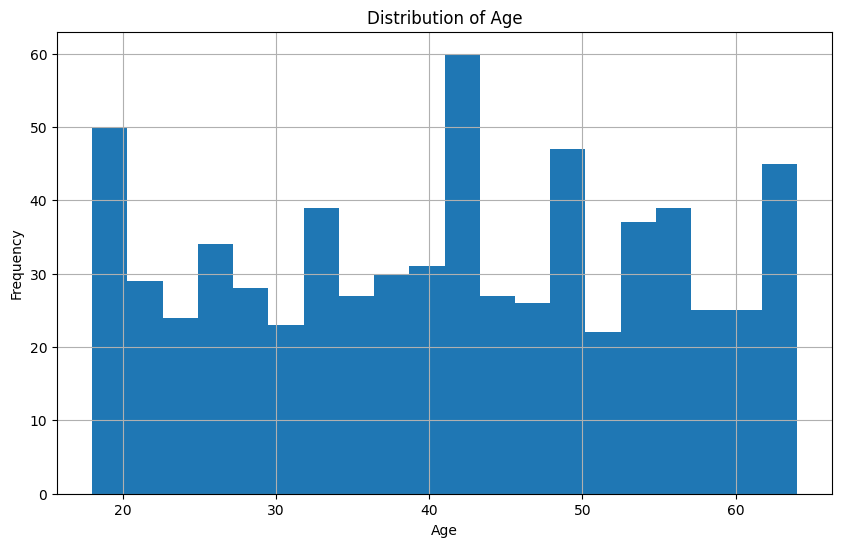

In [11]:
df['age'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## - Description :
- The histogram represents the frequency of ages in the dataset.
After observation, we noticed that the mostvalues in the normal range, which is approximately from 41 to 43, but also it illustrates there is a lot of outliers in the dataset.
 

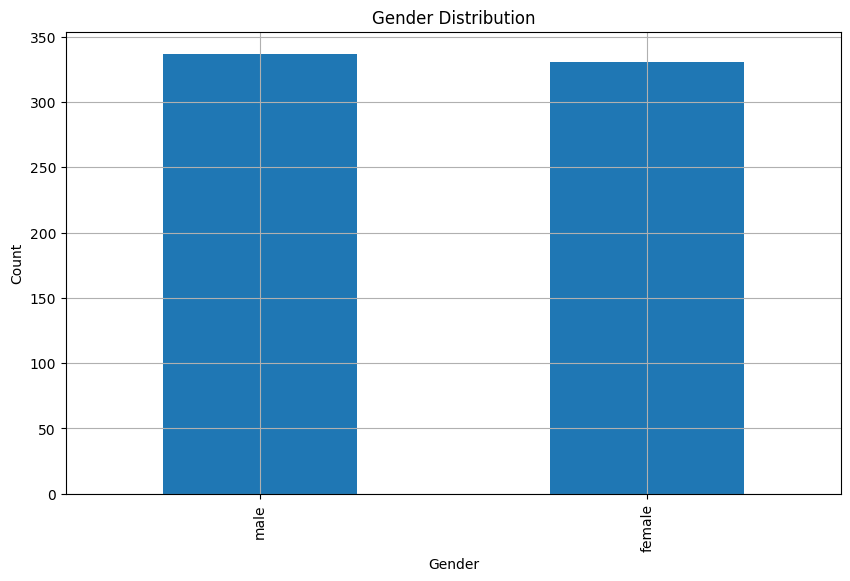

In [12]:
# Design bar plots to display categorical data insights
plt.figure(figsize=(10, 6))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


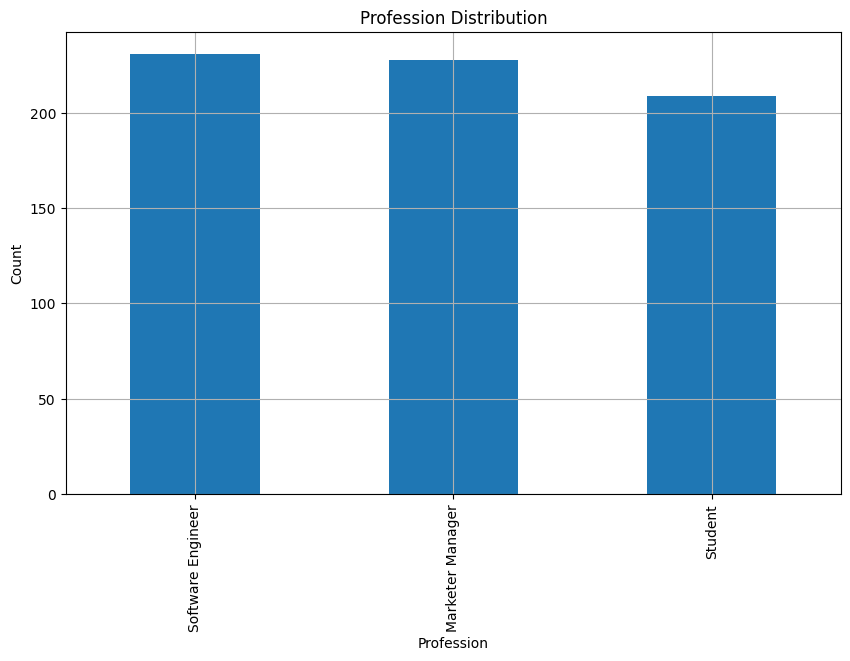

In [13]:
plt.figure(figsize=(10, 6))
df['profession'].value_counts().plot(kind='bar')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## - Description :

-The Bar plot represents the total Profession measures in the dataset.
It indicates that most of the users is a software engineer of profession.

In [14]:
#check if there is missing value:
missing_values = df.isnull()
print(missing_values)

missing_values_sum= df.isna().sum()
print(missing_values_sum)


#Remove rows with missing data(NaN) 
df_cleaned = df.dropna()

#Display The cleaned dataframe
print("/nDataFrame after removing rows rows with missing data:")
print(df_cleaned )

       age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
663  False   False       False     False      False     False         False   
664  False   False       False     False      False     False         False   
665  False   False       False     False      False     False         False   
666  False   False       False     False      False     False         False   
667  False   False       False     False      False     False         False   

     profession  income  indebt  isHomeOwner  Owns_

- Null and missing values can badly affect the efficiency of the dataset and the information
that can be extracted from the data later, thus we checked if our data contains missing or
null values and deleted these rows to get more efficient dataset.

In [15]:
# Select the 'age' 
age_column = df['age']
# Calculate the mean of the 'age' column
mean_age = age_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(age_column - mean_age)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier = df.drop(max_difference_index)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

In [16]:
# Select the 'time_spent' 
time_spent_col = df['time_spent']
# Calculate the mean of the 'time' column

mean_time = time_spent_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean1 = abs(time_spent_col - mean_time)
# Find the index of the row with the largest difference from the mean
max_difference_index1 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier1 = df.drop(max_difference_index1)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier1)

Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

In [17]:
# Select the 'income' 
income_col = df['income']
## Calculate the mean of the 'income' column

mean_income = income_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean2 = abs(income_col - mean_income)
# Find the index of the row with the largest difference from the mean
max_difference_index2 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier2 = df.drop(max_difference_index2)
# Display the original DataFrame and the DataFrame after removing the row with the largest difference
#from the mean
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier2)

df.to_csv('dataPreprocessing', index=False)


Original DataFrame:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        Fal

 - First, we identified all outliers in the numeric attributes. Second, we deleted the rows where
we find the outliers to produce more accurate dataset that help us to get more accurate
results later, finally we checked again to make sure all outliers have been deleted then
delete the new outliers that occurred because of the IQR change after deleting the rows in
the second step

### Statistical :

 1. Column "Age":
    - This column refers to the recorded ages of the participants in the study.
    - A total of 668 individuals were included in the study.
    - The average age for the participants is 41.16 years, which is the mean age value for all participants in the study.
    - The standard deviation for age is approximately 13.53, which is a measure of data dispersion around the mean. A higher value indicates a greater variation in ages among the participants.
    - The minimum age value in the sample is 18 years, indicating that there is at least one person in the sample who is 18 years old.
    - The maximum age value in the sample is 64 years, indicating that there is at least one person in the sample who is 64 years old.

 2. Column "Income":
    - This column refers to the recorded income of the participants in the study.
    - A total of 668 individuals were included in the study.
    - The average income for the participants is $15,051.50.
    - The standard deviation for income is approximately $2,980.63, which is a measure of data dispersion around the mean. A higher value indicates a greater variation in income among the participants.
    - The minimum income value in the sample is $10,021.
    - The maximum income value in the sample is $19,969.

 3. Column "Time Spent":
    - This column refers to the time spent by the participants in the study.
    - A total of 668 individuals were included in the study.
    - The average time spent is 5 units.
    - The standard deviation for time spent is approximately 2.561, which is a measure of data dispersion around the mean.
    - The minimum time value in the sample is 1 unit.
    - The maximum time value in the sample is 9 units.

In [18]:

summary_statistics=df.describe();
print(summary_statistics);


              age  time_spent       income
count  668.000000  668.000000    668.00000
mean    41.163174    5.004491  15051.50000
std     13.529534    2.561094   2980.63526
min     18.000000    1.000000  10021.00000
25%     30.000000    3.000000  12418.75000
50%     42.000000    5.000000  14956.50000
75%     53.000000    7.000000  17768.50000
max     64.000000    9.000000  19969.00000


 The displayed results represent the variances for each variable in the data. Variance is a measure of the spread of values around the mean in a dataset. Here's a concise description of each variable:

 - age: The variance value for the age variable. The high variance indicates a significant dispersion of age values among individuals in the data.
 - time_spent: The variance value for the time spent variable. The low variance suggests that individuals tend to spend a similar amount of time on average.
 - income: The variance value for the income variable. The high variance indicates a large spread of income values among individuals in the data.
 - indebt: The variance value for the debt variable. The low variance suggests that individuals tend to have a similar level of debt on average.
 - isHomeOwner: The variance value for the home ownership variable. The low variance indicates a relatively homogeneous distribution of home ownership among individuals.
 - Owns_Car: The variance value for the car ownership variable. The low variance suggests a relatively homogeneous distribution of car ownership among individuals.

 Variance values give us an idea of the data dispersion and how much it deviates from the mean. High variance values indicate significant variability and a wide range of values, while low variance values indicate less spread and a more homogeneous distribution of values.



In [19]:

var=df.var(numeric_only=True);
print(var);

age            1.830483e+02
time_spent     6.559200e+00
income         8.884187e+06
indebt         2.503726e-01
isHomeOwner    2.503389e-01
Owns_Car       2.466020e-01
dtype: float64


## Normalization

-We used Normalization to standardize the 'time_spent','age','income' columns so that all values are on a similar scale. This helps machine learning algorithms treat all features equally and prevents issues related to scale differences.

In [20]:
# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']
data_to_normalize = df[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax
print(df)

          age  gender  time_spent   platform  interests        location  \
0    0.826087    male       0.250  Instagram     Sports  United Kingdom   
1    0.608696  female       0.125   Facebook     Travel  United Kingdom   
2    0.304348    male       0.875  Instagram     Sports       Australia   
3    0.152174    male       0.000  Instagram  Lifestlye       Australia   
4    0.434783    male       0.250   Facebook     Travel   United States   
..        ...     ...         ...        ...        ...             ...   
663  0.695652  female       1.000    YouTube     Travel       Australia   
664  0.108696  female       0.250    YouTube  Lifestlye   United States   
665  0.086957  female       0.875  Instagram  Lifestlye  United Kingdom   
666  0.934783  female       0.375    YouTube     Sports       Australia   
667  0.021739  female       0.875    YouTube     Travel       Australia   

    demographics         profession    income  indebt  isHomeOwner  Owns_Car  
0          Urban  So

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']
data_to_normalize = df[columns_to_normalize]

#Z-score normalization for the selected column
zscore_scaler =  StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_zscore
print("Z-score normalized data:")
print(df)


Z-score normalized data:
          age  gender  time_spent   platform  interests        location  \
0    1.097447    male   -0.783256  Instagram     Sports  United Kingdom   
1    0.357769  female   -1.174007   Facebook     Travel  United Kingdom   
2   -0.677779    male    1.170498  Instagram     Sports       Australia   
3   -1.195554    male   -1.564758  Instagram  Lifestlye       Australia   
4   -0.233973    male   -0.783256   Facebook     Travel   United States   
..        ...     ...         ...        ...        ...             ...   
663  0.653640  female    1.561248    YouTube     Travel       Australia   
664 -1.343489  female   -0.783256    YouTube  Lifestlye   United States   
665 -1.417457  female    1.170498  Instagram  Lifestlye  United Kingdom   
666  1.467286  female   -0.392506    YouTube     Sports       Australia   
667 -1.639360  female    1.170498    YouTube     Travel       Australia   

    demographics         profession    income  indebt  isHomeOwner  Owns_C

In [22]:
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))
print("DataFrame after Decimal Scaling Normalization:")   
print(df)

DataFrame after Decimal Scaling Normalization:
      age  gender  time_spent   platform  interests        location  \
0    0.56    male         0.3  Instagram     Sports  United Kingdom   
1    0.46  female         0.2   Facebook     Travel  United Kingdom   
2    0.32    male         0.8  Instagram     Sports       Australia   
3    0.25    male         0.1  Instagram  Lifestlye       Australia   
4    0.38    male         0.3   Facebook     Travel   United States   
..    ...     ...         ...        ...        ...             ...   
663  0.50  female         0.9    YouTube     Travel       Australia   
664  0.23  female         0.3    YouTube  Lifestlye   United States   
665  0.22  female         0.8  Instagram  Lifestlye  United Kingdom   
666  0.61  female         0.4    YouTube     Sports       Australia   
667  0.19  female         0.8    YouTube     Travel       Australia   

    demographics         profession   income  indebt  isHomeOwner  Owns_Car  
0          Urban  Soft

## Encoding catgorical data
- We used encoding to convert the categorical 'gender' column ('Male' and 'Female') into numerical values. This conversion is necessary for machine learning models to interpret the data, as most models require numerical input.
.

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy import stats 
df = pd.read_csv('dummy_data_p326_2.csv')
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df)
df.to_csv('dataPreprocessing.csv', index=False)


     age  gender  time_spent   platform  interests        location  \
0     56       1           3  Instagram     Sports  United Kingdom   
1     46       0           2   Facebook     Travel  United Kingdom   
2     32       1           8  Instagram     Sports       Australia   
3     25       1           1  Instagram  Lifestlye       Australia   
4     38       1           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50       0           9    YouTube     Travel       Australia   
664   23       0           3    YouTube  Lifestlye   United States   
665   22       0           8  Instagram  Lifestlye  United Kingdom   
666   61       0           4    YouTube     Sports       Australia   
667   19       0           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0          Urban  Software Engineer   19774    True        False     False  
1    

### Discretization (Data Transformation)
 -We used Discretization here to categorize the 'time_spent' column into three levels ('Low', 'Medium', 'High') where low being from(1-3), medium being form (4-6) and high being from (7-9). This transformation simplifies the data, making i easier to interpret and analyze. It also helps normalize the data and can improve the performance

In [24]:
import pandas as pd
data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Discretiztion for a specific column ('time_spent')
columns_to_discretize='time_spent'
num_bins = 3
labels = ['Low', 'Medium', 'High']

# Perform Discretiztion  using the cut function 
df['discretized_'+columns_to_discretize] = pd.cut(df[columns_to_discretize], bins=num_bins,labels=labels)
print("Original DataFRame:")
print(df[['time_spent','discretized_time_spent']])
df.to_csv('dataPreprocessing.csv', index=False, columns=['discretized_time_spent'])


Original DataFRame:
     time_spent discretized_time_spent
0             3                    Low
1             2                    Low
2             8                   High
3             1                    Low
4             3                    Low
..          ...                    ...
663           9                   High
664           3                    Low
665           8                   High
666           4                 Medium
667           8                   High

[668 rows x 2 columns]


## Feature selection

In [25]:
import numpy as np
#Calculate the correlation matrix
num_col = df.select_dtypes(include=np.number)
correlationMatrix = num_col.corr()

print("correlation matrix:")
display(correlationMatrix)

correlation matrix:


,age,time_spent,income
age,1.000000,-0.064317,-0.073457
time_spent,-0.064317,1.000000,0.044039
income,-0.073457,0.044039,1.000000


In [26]:
import pandas as pd

df_sample = df.head()

# Display the sample of the DataFrame
print(df_sample)
#This code will print the first few rows of your DataFrame, allowing you to preview the data. Adjust the number of rows displayed by passing a number to the head() method, such as df.head(10) to display the first 10 rows.


   age  gender  time_spent   platform  interests        location demographics  \
0   56    male           3  Instagram     Sports  United Kingdom        Urban   
1   46  female           2   Facebook     Travel  United Kingdom        Urban   
2   32    male           8  Instagram     Sports       Australia    Sub_Urban   
3   25    male           1  Instagram  Lifestlye       Australia        Urban   
4   38    male           3   Facebook     Travel   United States        Urban   

          profession  income  indebt  isHomeOwner  Owns_Car  \
0  Software Engineer   19774    True        False     False   
1            Student   10564    True         True      True   
2   Marketer Manager   13258   False        False     False   
3  Software Engineer   14566   False         True      True   
4   Marketer Manager   19179    True         True      True   

  discretized_time_spent  
0                    Low  
1                    Low  
2                   High  
3                    Low  

In [27]:
import numpy as np ##Import necassary packages
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import *

df.to_csv('dataPreprocessing.csv', index=False)

In [28]:
num_dup = df.duplicated().sum()
clean_data = df.drop_duplicates()
print("Number of duplicated:")
print(num_dup)
print("Dataframe after dropping:")
print(clean_data)

Number of duplicated:
0
Dataframe after dropping:
     age  gender  time_spent   platform  interests        location  \
0     56    male           3  Instagram     Sports  United Kingdom   
1     46  female           2   Facebook     Travel  United Kingdom   
2     32    male           8  Instagram     Sports       Australia   
3     25    male           1  Instagram  Lifestlye       Australia   
4     38    male           3   Facebook     Travel   United States   
..   ...     ...         ...        ...        ...             ...   
663   50  female           9    YouTube     Travel       Australia   
664   23  female           3    YouTube  Lifestlye   United States   
665   22  female           8  Instagram  Lifestlye  United Kingdom   
666   61  female           4    YouTube     Sports       Australia   
667   19  female           8    YouTube     Travel       Australia   

    demographics         profession  income  indebt  isHomeOwner  Owns_Car  \
0          Urban  Software Engi

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('dummy_data_p326_2.csv')
df = pd.DataFrame(data)

# Extract columns to normalize
columns_to_normalize = ['time_spent','age','income']
data_to_normalize = df[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))
 

#Z-score normalization for the selected column
zscore_scaler =  StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_zscore

# Encode 'gender' column
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

# Discretization for a specific column ('time_spent')
columns_to_discretize = 'time_spent'
num_bins = 3
labels = ['Low', 'Medium', 'High']

# Perform Discretization using the cut function
df['discretized_time_spent'] = pd.cut(df[columns_to_discretize], bins=num_bins, labels=labels)

# Select the 'age' 
age_column = df['age']
# Calculate the mean of the 'age' column
mean_age = age_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(age_column - mean_age)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier = df.drop(max_difference_index)

# Select the 'time_spent' 
time_spent_col = df['time_spent']
# Calculate the mean of the 'time' column

mean_time = time_spent_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean1 = abs(time_spent_col - mean_time)
# Find the index of the row with the largest difference from the mean
max_difference_index1 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier1 = df.drop(max_difference_index1)

# Select the 'income' 
income_col = df['income']
## Calculate the mean of the 'income' column

mean_income = income_col.mean()
# Calculate the absolute differences from the mean
differences_from_mean2 = abs(income_col - mean_income)
# Find the index of the row with the largest difference from the mean
max_difference_index2 = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier2 = df.drop(max_difference_index2)

summary_statistics=df.describe();
var=df.var(numeric_only=True);


# Save the DataFrame to a CSV file with all columns
df.to_csv('dataPreprocessing.csv', index=False)
